## Main Formula
$$ P(sentence) = \prod_i^{n} \frac{\# W_iW_{i+1}}{\# W_{i+1}}P(w_n) $$

In [4]:
import pandas as pd
import numpy as np
file_name = r'D:\dev\workspace\nlp_learning\datasource\sqlResult_1558435.csv'

In [5]:
content = pd.read_csv(file_name, encoding='gb18030')

In [6]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [7]:
articles = content['content']

In [8]:
import re

In [9]:
def token(data: str):
    return re.findall('\w+', data)

In [10]:
from collections import Counter
import jieba

In [11]:
# cut words via jieba, then for calculating frequency
with_jieba_cut = Counter(jieba.cut(''.join(token(articles[30]))))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.102 seconds.
Prefix dict has been built successfully.


In [12]:
# select most common Top10
with_jieba_cut.most_common()[:10]

[('的', 32),
 ('印度', 14),
 ('高温', 14),
 ('在', 11),
 ('了', 10),
 ('人', 6),
 ('和', 6),
 ('我', 5),
 ('热浪', 5),
 ('都', 5)]

In [13]:
tokens = [''.join(token(str(a))) for a in articles]

In [18]:
with open(r'D:\dev\workspace\nlp_learning\homework\1.1\tokens.csv', 'w') as f:
    f.writelines(tokens)

In [19]:
with open(r'D:\dev\workspace\nlp_learning\homework\1.1\tokens.csv', 'r') as rh:
    TOKEN = jieba.cut(rh.read())

In [20]:
word_count = Counter(TOKEN)

In [21]:
word_count.most_common(100)

[('的', 703716),
 ('n', 378454),
 ('在', 263597),
 ('月', 189330),
 ('日', 166267),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123105),
 ('了', 121939),
 ('是', 100914),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83263),
 ('中', 73923),
 ('中国', 71178),
 ('２', 70521),
 ('2017', 69887),
 ('记者', 62149),
 ('二线', 61998),
 ('将', 61421),
 ('与', 58309),
 ('等', 58160),
 ('为', 57018),
 ('5', 54555),
 ('照片', 52271),
 ('4', 51600),
 ('对', 50316),
 ('上', 47451),
 ('也', 47401),
 ('有', 45768),
 ('５', 40857),
 ('说', 39016),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36864),
 ('国际', 35842),
 ('nn', 35470),
 ('４', 34659),
 ('比赛', 32232),
 ('６', 30575),
 ('到', 30109),
 ('人', 29565),
 ('从', 29485),
 ('6', 28973),
 ('都', 28028),
 ('不', 27964),
 ('后', 27392),
 ('当日', 27186),
 ('就', 26685),
 ('并', 26568),
 ('国家', 26439),
 ('７', 26386),
 ('企业', 26147),
 ('进行', 25987),
 ('美国', 25485),
 ('3', 25484),
 ('举行', 25389),
 ('被', 25277),
 ('北京', 25245),
 ('体育', 24873),
 ('2', 24371),
 ('1', 24125),
 ('这', 24124),
 ('新', 2

In [22]:
frequencies = [f for w, f in word_count.most_common(100)]
x = [i for i in range(100)]

In [23]:
%matplotlib inline

In [24]:
import matplotlib.pyplot as plt

### Relationship vary as frequency index

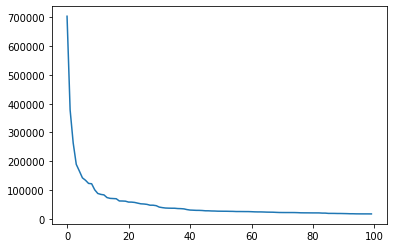

In [25]:
plt.plot(x, frequencies)